In [1]:
from __future__ import division
import numpy as np
from neuron import h, gui
import matplotlib.pyplot as plt
plt.ion()

### Instantiate model

In [2]:
h.load_file("import3d.hoc")
# for some weird reason NEURON doesn't care about the OS
# and Windows uses the forward slash: '/' as well...
h.load_file("models/L5PCbiophys3.hoc")
h.load_file("models/L5PCtemplate.hoc")
morph_fname = "morphologies/cell1.asc"
L5PC = h.L5PCtemplate(morph_fname)

### Add input, recorders, and plot function

In [3]:
# input to the soma
stim = h.IClamp(0.5, sec=L5PC.soma[0])
stim.dur = 5
stim.delay = 150
stim_current = h.Vector()
stim_current.record(stim._ref_i);
# input to the apical point
syn = h.epsp(L5PC.apic[36](0.9))
syn.tau0 = 0.5
syn.tau1 = 5
syn.onset = stim.delay + 5
syn_current = h.Vector()
syn_current.record(syn._ref_i);
# recording
t = h.Vector()
t.record(h._ref_t)
soma_v = h.Vector()
soma_v.record(L5PC.soma[0](0.5)._ref_v)
nexus_v = h.Vector()
nexus_v.record(L5PC.apic[36](0.9)._ref_v)
stim_current = h.Vector()
stim_current.record(stim._ref_i);

In [4]:
def plot_result(t, soma_v, nexus_v, stim_current, syn_current, show_from=4400):
    """Plot input currents, soma and dendrite voltages"""
    t = np.array(t)[show_from:]
    soma_v = np.array(soma_v)[show_from:]
    nexus_v = np.array(nexus_v)[show_from:]
    stim_current = np.array(stim_current)[show_from:]
    syn_current = np.array(syn_current)[show_from:]
    
    f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(6.5,3), gridspec_kw={'height_ratios':[4, 1,1]})
    ax0.plot(t, soma_v, label = 'soma')
    ax0.plot(t, nexus_v, label = 'apic[36]')
    ax0.set_ylabel('Voltage (mV)')
    ax0.set_ylim(-80, 40)
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)
    ax0.legend(frameon=False)

    ax1.plot(t, -np.array(syn_current), color='red', label='EPSP-like current')
    ax1.set_ylim(-0.02, 2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.legend(frameon=False)

    ax2.plot(t, stim_current, color='black', label='step current')
    ax2.set_ylabel('Current (nA)', ha='left', labelpad=15)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylim(-0.02, 2)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.legend(frameon=False)

### Simulate 3 different scenarios:
- stimuate only apical
- only soma -> somatic spike
- both -> Ca++ spike in the dendrite and somatic burst

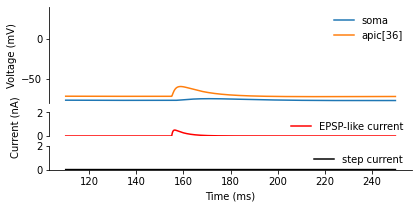

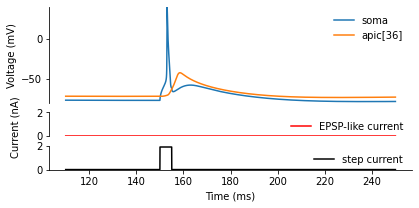

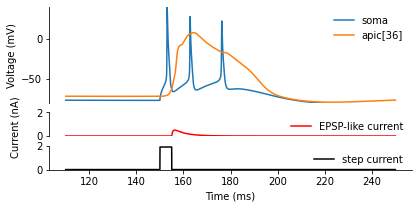

In [5]:
# general settings
h.v_init = -80
h.tstop = 250
h.celsius = 37

# simulations
syn.imax = 0.5 
stim.amp = 0
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)

syn.imax = 0
stim.amp = 1.9
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)

syn.imax = 0.5
stim.amp = 1.9
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)